<h2>Импортируем данные из файла и просматриваем их</h2>


In [2]:
import pandas as pd



data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h2>Просматриваем типы данных, чтобы убедиться, что нет "испорченных" столбцов, типы которых не совпадают с описанием</h2>


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<h2>Проверяем, есть ли пустые ячейки в данных</h2>


In [4]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<p>Оказалось, что в столбце total_bedrooms есть пустые значения. Их немного, но они есть. Терять их не хочется, пожтому будем их заполнять</p>

<h2>Попробуем посмотреть некоторые строки с пустыми значениями</h2>


In [5]:
data[data['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


<h2>Заполняем пропуски с помощью группировки по другим столбцам</h2>
<p></p>

In [6]:
data.loc[:, 'total_bedrooms'] = data.groupby(['total_rooms'])['total_bedrooms'].transform(lambda x: x.fillna(x.median()))

<p>Были выбран столбец total_rooms, так как есть гипотеза, что у квартир с одинаковым количеством комнат количество спален может совпадать</p>

<h2>Проверяем, остались ли еще пропуски</h2>
<p></p>

In [7]:
data.isna().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        15
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

<h2>Пропуски остались. Заполним их медианным значением</h2>


In [8]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

In [9]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<h2>Проверим, есть ли в данных дубликаты</h2>
<p></p>

In [10]:
data.duplicated().sum()

0

<h2>В таблице есть столбнц с категориальными значениями. Используем для него one-hot-encoding</h2>
<p></p>

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ohe = OneHotEncoder()
main_cat_matrix = ohe.fit_transform(data[['ocean_proximity']])

main_cat_matrix = main_cat_matrix.toarray()

main_cat_df = pd.DataFrame(main_cat_matrix, columns=ohe.categories_[0])
main_cat_df.index = data.index

main_cat_df.head(5)



,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


<p>Получилось разбить все значения на 5</p>

<h2>Заменяем столбец с категориальными значениями на 5 новых, которые только что сделали</h2>
<p></p>

In [12]:
data = data.drop(columns=['ocean_proximity'])

data = data.join(main_cat_df)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


<h2>Выделяем числовые столбцы. Выделяем из датафрейма столбец для предсказания. Удаляем столбец, который нужно предсказать</h2>
<p></p>

In [13]:
numeric_columns = ["longitude", 	"latitude",	"housing_median_age",
                   "total_rooms",	"total_bedrooms",	"population",	"households",
                   "median_income"]


y = data["median_house_value"]

X = data.drop(columns=['median_house_value'])



<h2>Нарисуем все числовые столбцы в виде графиков, чтобы посмотерть на распределение</h2>
<p></p>

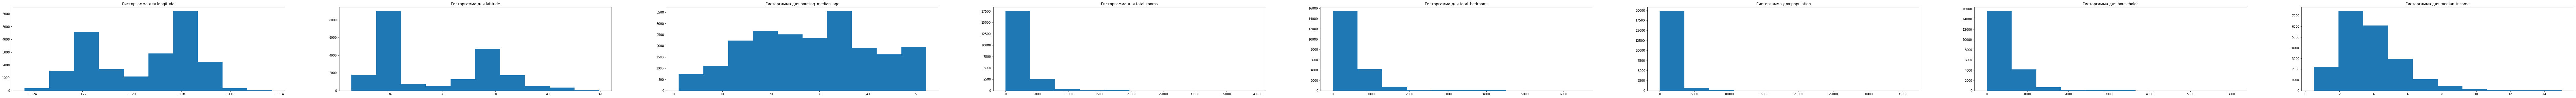

In [14]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1, len(numeric_columns), figsize=(150, 5))
for i in range(len(numeric_columns)):
    ax[i].set_title(f'Гисторгамма для {numeric_columns[i]}')
    ax[i].hist(data[numeric_columns[i]])
plt.show()

<p>Никаких противоречий не выявлено. Все значения довольно хорошие. Единственное, что хотелось бы посмотреть - total_bedrooms. Здесь есть маленькие значения, будто спален вообще нет</p>

In [15]:
data['total_bedrooms'].value_counts()

280.0     55
435.0     52
331.0     51
345.0     50
343.0     49
          ..
1745.0     1
1163.0     1
2009.0     1
3753.0     1
1755.0     1
Name: total_bedrooms, Length: 1972, dtype: int64

<p>Посмотрели все возможные значения. Все хорошо</p>

<h2>Проверим корреляцию данных</h2>


In [16]:
import seaborn as sns


corr_data = data.drop(columns=['median_house_value'])


corr_digit = corr_data[numeric_columns].corr()
corr_digit

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068177,0.099773,0.055310,-0.015176
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065864,-0.108785,-0.071035,-0.079809
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320627,-0.296244,-0.302916,-0.119034
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.928683,0.857126,0.918484,0.198050
total_bedrooms,0.068177,-0.065864,-0.320627,0.928683,1.000000,0.875194,0.976065,-0.006543
population,0.099773,-0.108785,-0.296244,0.857126,0.875194,1.000000,0.907222,0.004834
households,0.055310,-0.071035,-0.302916,0.918484,0.976065,0.907222,1.000000,0.013033
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.006543,0.004834,0.013033,1.000000


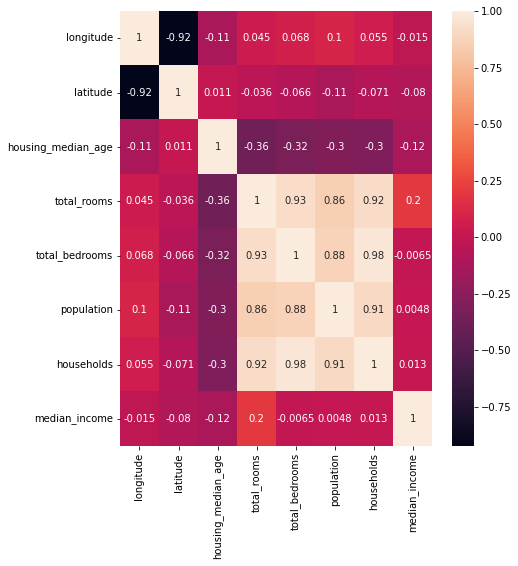

In [17]:
plt.figure(figsize=(len(numeric_columns) - 1, 8))
sns.heatmap(corr_digit, annot=True)
plt.show()

<p>Как видно по графику, довольно большое количество столбцов находятся в зависимости друг от друга. Можно сделать следующие выводы:
</p>

1.   Широта и долгота очень сильно связаны друг с другом. Это и понятно. Они являются координатами
2.   total_rooms очень сильно коррелирует с total_bedrooms, population и households. Это можно довольно легко объяснить. Чем больше комнат, тем больше спален. Чем больше комнат, тем больше людей.
3. У возраста тоже есть небольшая связь (обратная зависимость) с некоторыми столбцами. Например, чем старше дом, тем меньше комнат.



<h2>Начинаем создавать модели для предсказаний</h2>
<p>Первой будет модель линейной регрессии без никаких дополнений</p>

In [18]:
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()

estimator.fit(X, y)

LinearRegression()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_predicted = estimator.predict(X)

print(f'MAE: {mean_absolute_error(y, y_predicted)}')
print(f'MSE: {mean_squared_error(y, y_predicted)}')
print(f'RMSE: {mean_squared_error(y, y_predicted) ** 0.5}')

MAE: 49797.946368624755
MSE: 4715935939.685398
RMSE: 68672.67243733419


<p>Довольно большой процент ошибок. Будем пробовать еще</p>

<h2>Попробуем использовать PCA</h2>


In [21]:
from sklearn.decomposition import PCA


pca_proc = PCA(n_components=13)
X_train_pca = pca_proc.fit_transform(X)
X_train_pca[:10]

array([[-2.13032833e+03, -2.52980439e+02,  6.43691246e+01,
         5.51611088e+00,  9.08520624e+00,  2.67418494e+00,
        -4.39995536e+00, -4.46782377e-01,  3.56535781e-01,
        -6.12790977e-01,  2.08695452e-01, -2.05674906e-04,
        -1.36637322e-16],
       [ 4.52912623e+03, -1.03522934e+03,  3.60174748e+01,
         1.32562640e+02,  3.99118899e-01,  2.41045498e+00,
        -1.90532007e+00, -1.05665584e-03,  2.99733324e-01,
        -6.57699024e-01,  2.34256248e-01,  7.27953640e-04,
         1.05057424e-14],
       [-1.52264186e+03, -3.52577260e+02,  1.08283534e+02,
         4.47584060e+00,  2.15459556e+01,  2.60180379e+00,
        -3.01722790e+00, -3.09422478e-01,  3.14973519e-01,
        -5.67540754e-01,  1.79626768e-01, -6.08236382e-04,
        -7.65705215e-17],
       [-1.65348486e+03, -2.04866398e+02,  3.12001015e+01,
         2.86292287e+00,  2.07994113e+01,  2.82242594e+00,
        -1.96070788e+00, -1.13412514e-01,  3.09914284e-01,
        -5.79929771e-01,  1.70163937e

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_pca, y)

train_pred = lin_reg.predict(X_train_pca)

print(f'MAE: {mean_absolute_error(y, train_pred)}')
print(f'MSE: {mean_squared_error(y, train_pred)}')
print(f'RMSE: {mean_squared_error(y, train_pred) ** 0.5}')



MAE: 49797.94636862454
MSE: 4715935939.685398
RMSE: 68672.67243733419


<p>Результат не меняется, если использовать линейную модель и PCA</p>

<h2>Попробуем использовать нормализацию данных. Для этого возьмем StandardScaler. Также в качестве модели возьмем KNeighborsClassifier</h2>
<p></p>

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier

stand = StandardScaler()
stand_train = stand.fit_transform(X[numeric_columns])

X_train = X.copy()
X_train.loc[:, numeric_columns] = stand_train

X_train_sample = X_train
y_train_sample = y.loc[X_train_sample.index]

#  neib = KNeighborsRegressor(n_neighbors=9, weights='uniform', metric='cosine', n_jobs=-1)
neib = KNeighborsRegressor(n_neighbors=9, weights='distance', algorithm='auto', n_jobs=-1)
neib.fit(X_train_sample, y_train_sample)

train_pred = neib.predict(X_train_sample)


print(f'MAE: {mean_absolute_error(train_pred, y_train_sample)}')
print(f'MSE: {mean_squared_error(train_pred, y_train_sample)}')
print(f'RMSE: {mean_squared_error(train_pred, y_train_sample) ** 0.5}')


MAE: 0.0
MSE: 0.0
RMSE: 0.0


<p>Здесь результат уже лучше, но попробуем еще лучше</p>

<h2>Используем линейную регрессию с нормализованными данными</h2>
<p></p>

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_sample, y)

train_pred = lin_reg.predict(X_train_sample)

print(f'MAE: {mean_absolute_error(y, train_pred)}')
print(f'MSE: {mean_squared_error(y, train_pred)}')
print(f'RMSE: {mean_squared_error(y, train_pred) ** 0.5}')


MAE: 49797.94636862452
MSE: 4715935939.685397
RMSE: 68672.67243733417


<p>Результат лучше не стал</p>

<h2>Объединяем нормализацию данных и PCA</h2>
<p></p>

In [54]:
pca_proc = PCA(n_components=13)
X_train_pca = pca_proc.fit_transform(X_train_sample)

lin_reg = LinearRegression()
lin_reg.fit(X_train_pca, y)

train_pred = lin_reg.predict(X_train_pca)

print(f'MAE: {mean_absolute_error(y, train_pred)}')
print(f'MSE: {mean_squared_error(y, train_pred)}')
print(f'RMSE: {mean_squared_error(y, train_pred) ** 0.5}')

MAE: 49797.94636862452
MSE: 4715935939.685398
RMSE: 68672.67243733419


<p>Лучше не стало</p>

<h2>Используем DecisionTreeClassifier</h2>
<p></p>

In [48]:
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X, y)


tree_pred = tree.predict(X)
print(f'MAE: {mean_absolute_error(tree_pred, y)}')
print(f'MSE: {mean_squared_error(tree_pred, y)}')
print(f'RMSE: {mean_squared_error(tree_pred, y) ** 0.5}')


MAE: 207568.94510658915
MSE: 61996834299.473305
RMSE: 248991.6349989961


<p>Тут результаты совсем плохие. Даже улучшать нет смысла</p>

<h2>И последнее. Так как модель KNeighborsRegressor показала себя лучше всех, попробуем перебрать параметры для наилучшего результата</h2>
<p></p>

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score


knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10),
              'knn__weights': ['uniform', 'distance'],
              'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              }

knn_grid = GridSearchCV(knn_pipe, knn_params, n_jobs=-1,
verbose=True)

knn_grid.fit(X, y)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


({'knn__algorithm': 'auto', 'knn__n_neighbors': 9, 'knn__weights': 'distance'},
 0.543545182555091)

<p>Среди выбранных параметров лучше всего себя показали алгоритм auto, количество соседей - 9Б веса - distance. Создадим модель по таким параметрам и обучим на наших данных, посмотрим результат</p>